In [138]:
import pandas as pd
import numpy as np

df=pd.read_excel('C:\\Users\\91978\\Desktop\\inflation_prediction_project\\Model_building\\combine_dataset.xlsx',index_col='Date',parse_dates=True)

In [139]:
df.iloc[:280].isnull().sum()
data=df.iloc[:280]

In [140]:
data.isnull().sum()

Broad_Money(M3)(%)       0
cpi_index                0
exchange_rate            0
GDP % Change             0
reverse_repo_rate        0
Unemployment Rate (%)    0
Repo_Rate                0
Inflation                0
dtype: int64

In [141]:
# Define the number of lag periods
num_lags = 1 # Adjust as needed

# Create lag features for each variable
for col in data.columns:
    for i in range(1, num_lags + 1):
        data[f'{col}_lag{i}'] = data[col].shift(i)

# Drop rows with NaN values resulting from the shift operation
data.dropna(inplace=True)


C:\Users\91978\AppData\Local\Temp\ipykernel_9128\3058377672.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_lag{i}'] = data[col].shift(i)
C:\Users\91978\AppData\Local\Temp\ipykernel_9128\3058377672.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_lag{i}'] = data[col].shift(i)
C:\Users\91978\AppData\Local\Temp\ipykernel_9128\3058377672.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [142]:
data.head()

,Broad_Money(M3)(%),cpi_index,exchange_rate,GDP % Change,reverse_repo_rate,Unemployment Rate (%),Repo_Rate,Inflation,Broad_Money(M3)(%)_lag1,cpi_index_lag1,exchange_rate_lag1,GDP % Change_lag1,reverse_repo_rate_lag1,Unemployment Rate (%)_lag1,Repo_Rate_lag1,Inflation_lag1
Date,,,,,,,,,,,,,,,,
2000-08-01,0.1523,36.732042,45.7687,0.866667,13.5,7.749667,15.00,4.0,0.1504,36.897875,44.8405,1.300000,8.0,7.744583,10.00,5.0
2000-09-01,0.1488,36.814958,45.9680,0.433333,10.0,7.754750,13.50,3.5,0.1523,36.732042,45.7687,0.866667,13.5,7.749667,15.00,4.0
2000-10-01,0.1416,37.229541,46.4252,0.000000,8.0,7.759833,10.25,2.7,0.1488,36.814958,45.9680,0.433333,10.0,7.754750,13.50,3.5
2000-11-01,0.1505,37.312458,46.8214,0.166667,8.0,7.764917,10.00,2.7,0.1416,37.229541,46.4252,0.000000,8.0,7.759833,10.25,2.7
2000-12-01,0.1625,36.980792,46.7845,0.333333,8.0,7.770000,10.00,3.5,0.1505,37.312458,46.8214,0.166667,8.0,7.764917,10.00,2.7


<Axes: xlabel='Date'>

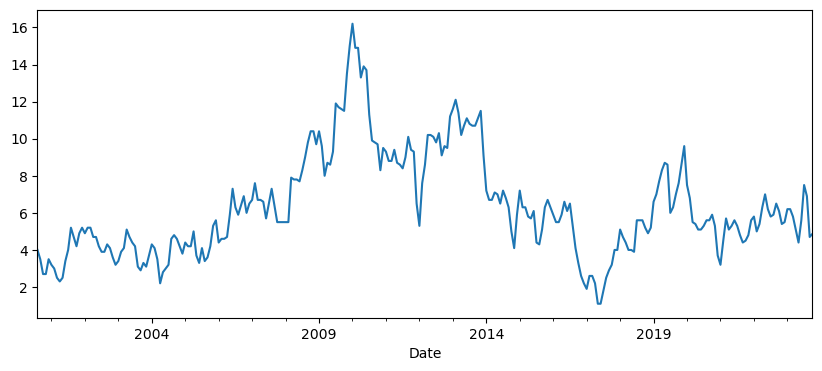

In [143]:
data['Inflation'].plot(figsize=(10,4))

In [144]:
from pmdarima import auto_arima

# Perform auto ARIMA with seasonal=True
stepwise_fit_se = auto_arima(data['Inflation'], seasonal=True, trace=True, suppress_warnings=True)

# Print the summary of the best model
print(stepwise_fit_se.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=672.598, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=686.884, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=682.032, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=679.329, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=684.888, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=673.355, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=671.160, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=679.977, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=674.389, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=672.872, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=672.508, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=658.544, Time=0.75 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=660.235, Time=0.56 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=659.841, Time=0.75 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=658.0

In [153]:


from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model with the specified parameters including seasonal_order
order = (3, 1, 3)  # Non-seasonal ARIMA order
seasonal_order = (0,0,0,0)  # Seasonal ARIMA order with yearly seasonality
sarima_model = SARIMAX(data['Inflation'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)

# Fit the SARIMA model
sarima_fit = sarima_model.fit()

# Print the summary of the SARIMA model
print(sarima_fit.summary())


c:\Users\91978\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\91978\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\91978\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:              Inflation   No. Observations:                  279
Model:               SARIMAX(3, 1, 3)   Log Likelihood                -321.857
Date:                Sun, 07 Apr 2024   AIC                            657.715
Time:                        16:08:47   BIC                            683.007
Sample:                    08-01-2000   HQIC                           667.866
                         - 10-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2725      0.642      1.982      0.047       0.014       2.531
ar.L2         -0.7442      0.914     -0.814      0.416      -2.536       1.047
ar.L3         -0.1484      0.623     -0.238      0.8

In [154]:
train=data.iloc[:260]
test=data.iloc[-20:]
print(train.shape,test.shape)

(260, 16) (20, 16)


In [155]:
start=len(train)
end=len(train)+len(test)-1
pred_sarima=sarima_fit.predict(start=start,end=end,type='levels')
print(pred_sarima)

2022-04-01    5.014239
2022-05-01    6.136274
2022-06-01    7.062196
2022-07-01    6.344190
2022-08-01    6.142694
2022-09-01    6.235388
2022-10-01    6.670179
2022-11-01    5.913276
2022-12-01    5.072733
2023-01-01    5.273905
2023-02-01    6.130917
2023-03-01    6.201398
2023-04-01    5.917119
2023-05-01    5.280342
2023-06-01    4.598492
2023-07-01    5.862227
2023-08-01    7.524543
2023-09-01    6.449963
2023-10-01    4.187212
2023-11-01    4.857353
Freq: MS, Name: predicted_mean, dtype: float64


c:\Users\91978\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Date'>

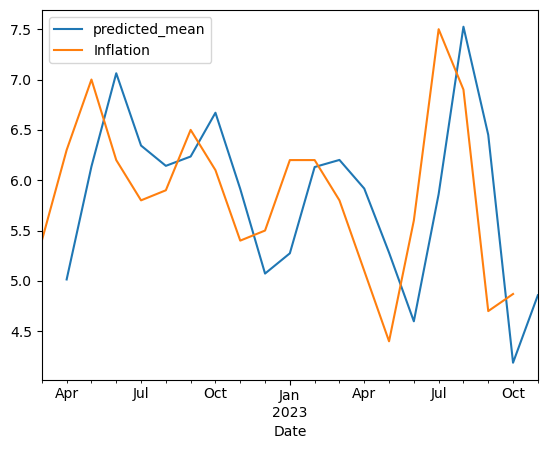

In [156]:
pred_sarima.plot(legend=True)
test['Inflation'].plot(legend=True)


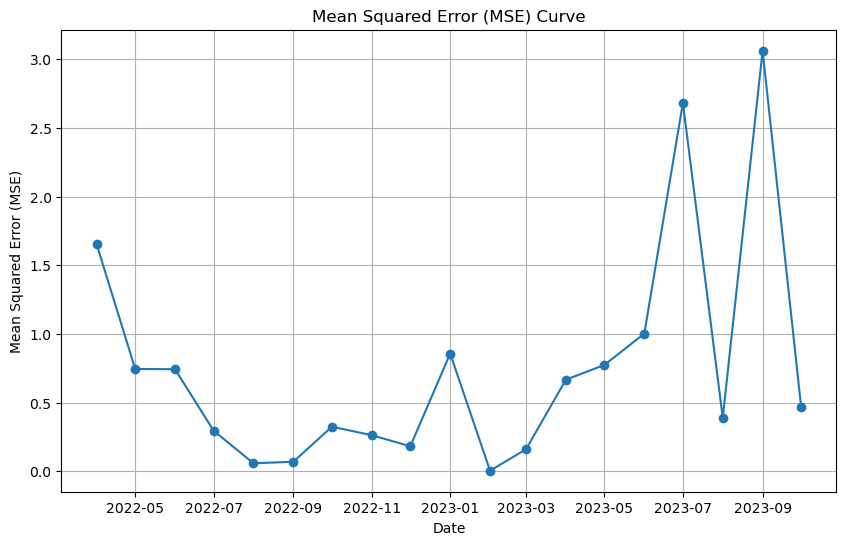

In [162]:
import numpy as np
import matplotlib.pyplot as plt

# Trim squared_errors array to match the length of test.index
squared_errors_trimmed = squared_errors[:len(test.index)]

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(test.index, squared_errors_trimmed, marker='o', linestyle='-')
plt.title('Mean Squared Error (MSE) Curve')
plt.xlabel('Date')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()


In [169]:
from sklearn.metrics import r2_score
import numpy as np

# Calculate R2 score
r2 = r2_score(test['Inflation'], pred_sarima)
print("R-squared (R2) score:", r2)



R-squared (R2) score: 0.8911790372465526


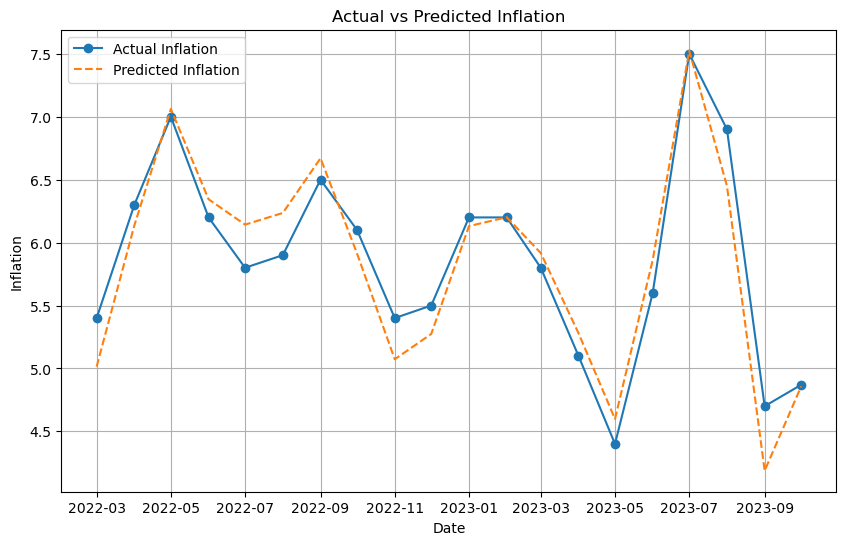

Mean Absolute Error (MAE): 0.20864467421025287


In [177]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Calculate MAE
mae = mean_absolute_error(test['Inflation'], pred_sarima)

# Plot the predicted values and the actual values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Inflation'], label='Actual Inflation', marker='o')
plt.plot(test.index, pred_sarima, label='Predicted Inflation', linestyle='--')
plt.title('Actual vs Predicted Inflation')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.legend()
plt.grid(True)
plt.show()

print("Mean Absolute Error (MAE):", mae)


In [171]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# print(test['Inflation'].mean())
rmse=sqrt(mean_squared_error(pred_sarima,test['Inflation']))
print("MEAN SQUARE ERRORR IS ",rmse)

MEAN SQUARE ERRORR IS  0.2527521423095339


In [172]:
model2_sarima=ARIMA(data['Inflation'],order=(2,1,3))
model2_sarima=model2_sarima.fit()


c:\Users\91978\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\91978\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\91978\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
